Loading a Dataset
-------------------

The dataset is made available by Kaggle, assessed by the link https://www.kaggle.com/techsash/waste-classification-data. The data set is divided into train data(85%) and test data(15%), the test and train data set contains two folders named O(orgainic) and R(recyclable). It consists of train images(22564 images) which are colored images with inconsistent dimensions. The O folders contain images of organic materials which are not recyclable and therefore should be disposed of while the R folders contain images of recyclable materials.

We load the `FashionMNIST Dataset <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split

from torchvision.utils import make_grid
from torch.utils.data import random_split
import torch
import random
import numpy as np
import pandas as pd
import io
import os


In [5]:

training_data = datasets.FashionMNIST(
    root="fashionmnist",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="fashionmnist",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fashionmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashionmnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fashionmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashionmnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fashionmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashionmnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fashionmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashionmnist/FashionMNIST/raw

Processing...
Done!


Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



In [6]:
labels_names = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle-Boot",
}

def create_image(data_image):
    '''
    data_image: an image with label from torch dataset
    '''
    img, label = data_image
    plt.imshow(img.squeeze(), cmap="gray")
    # We use jpg format.
    filename = labels_names[label]+'.jpg'
    plt.imsave(filename, np.array(img.squeeze()), cmap='gray')
    print('Image file name: ',filename)
    

In [7]:
# Each item is a couple of image data and a label - GRAY IMAGE
img, label = training_data[1]
np.array(img.squeeze()).shape

(28, 28)

Image file name:  Dress.jpg


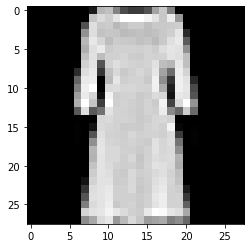

In [8]:
# Test our function by choose an image randomly
random_idx = torch.randint(len(training_data), size=(1,)).item()
create_image(training_data[random_idx])

In [9]:
len(training_data)

60000

In [11]:

# Create valid data
valid_size = int(0.3 * len(training_data))
train_size = int(0.7 * len(training_data))
valid, train = random_split(training_data, [valid_size, train_size])
print(len(valid), len(train))

18000 42000


In [12]:
! mkdir images

In [13]:
%%capture
def write_images(dataset, dirname):
    fullnames_list = []

    if os.path.isdir(dirname) == False:
        os.mkdir(dirname)
    # create subfolder 0-> 9
    for j in range(10):
        newdir = dirname+'/'+str(j)
        if os.path.isdir(newdir) == False:
            os.mkdir(newdir)
    count = [0 for j in range(10)]
    
    for n in range(len(dataset)):
        img, label = dataset[n]
        count[label] += 1
        # Create filename
        fullname = dirname + '/' + str(label) + '/' + labels_names[label] + '_' 
        # We use jpg format.
        fullname += str(count[label]) + '.jpg'
        fullnames_list.append(fullname)
        
        image = np.array(img.squeeze())
        plt.imsave(os.path.normpath(fullname), image, cmap='gray')
    # create new column 'fullname' for dataframe 
    tmp = pd.DataFrame({'fullname': fullnames_list})
#     tmp = pd.concat([tmp, df], axis=1)
    return tmp

test_df = write_images(test_data, 'images/test')
train_df = write_images(train, 'images/train')
valid_df = write_images(valid, 'images/valid')

In [14]:
print(len(test_df), len(train_df), len(valid_df))

10000 42000 18000


In [15]:
test_df.head()

,fullname
0,images/test/9/Ankle-Boot_1.jpg
1,images/test/2/Pullover_1.jpg
2,images/test/1/Trouser_1.jpg
3,images/test/1/Trouser_2.jpg
4,images/test/6/Shirt_1.jpg


In [16]:
# Try to get label from fullname
valid_df['label'] = valid_df['fullname'].apply(lambda x: x.split('/')[2])
valid_df['label'].value_counts()

4    1851
5    1825
1    1811
3    1808
2    1806
9    1805
0    1803
6    1802
8    1750
7    1739
Name: label, dtype: int64

In [17]:
# Try to get label from fullname
train_df['label'] = train_df['fullname'].apply(lambda x: x.split('/')[2])
train_df['label'].value_counts()

7    4261
8    4250
6    4198
0    4197
9    4195
2    4194
3    4192
1    4189
5    4175
4    4149
Name: label, dtype: int64

In [18]:
def add_label(df):
    df['label'] = df['fullname'].apply(lambda x: int(x.split('/')[2]))
    return df

train_df = add_label(train_df)
valid_df = add_label(valid_df)
test_df = add_label(test_df)

In [19]:
valid_df.info()
test_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullname  18000 non-null  object
 1   label     18000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 281.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullname  10000 non-null  object
 1   label     10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fullname  42000 non-null  object
 1   label     42000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 656.4+ KB


In [20]:
# Save filename list for later use
def save_df2csv(df, csvname):
    df.to_csv(csvname, index=False)

save_df2csv(test_df, 'test.csv')
save_df2csv(train_df, 'train.csv')
save_df2csv(valid_df, 'valid.csv')

# Now we have folder images with 3 subfolders train, valid, and test.

In [21]:
! ls -l images

total 12
drwxr-xr-x 12 root root 6144 Feb 20 19:05 test
drwxr-xr-x 12 root root 6144 Feb 20 19:06 train
drwxr-xr-x 12 root root 6144 Feb 20 19:14 valid


In [23]:
import pandas as pd
testset = pd.read_csv('test.csv')
testset.head()

,fullname,label
0,images/test/9/Ankle-Boot_1.jpg,9
1,images/test/2/Pullover_1.jpg,2
2,images/test/1/Trouser_1.jpg,1
3,images/test/1/Trouser_2.jpg,1
4,images/test/6/Shirt_1.jpg,6


In [24]:
testset['label'] = testset['fullname'].apply(lambda x: x.split('/')[2])
testset['label'].value_counts()

4    1000
1    1000
8    1000
5    1000
0    1000
7    1000
9    1000
2    1000
3    1000
6    1000
Name: label, dtype: int64

In [25]:
labels_names = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coatadd_label", 
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle-Boot",
}
classes = pd.DataFrame({'class_name': labels_names})
classes.to_csv('classes.csv', index=False)

In [26]:
trainset =  pd.read_csv('train.csv')
trainset.head()

,fullname,label
0,images/train/4/Coat_1.jpg,4
1,images/train/1/Trouser_1.jpg,1
2,images/train/6/Shirt_1.jpg,6
3,images/train/3/Dress_1.jpg,3
4,images/train/7/Sneaker_1.jpg,7


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

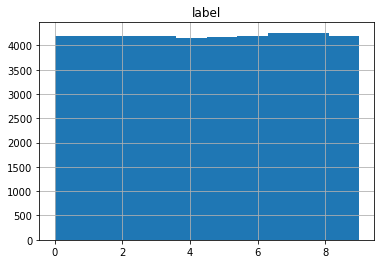

In [27]:
train_df.hist()

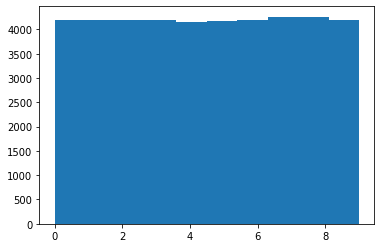

In [28]:
x = trainset.label
plt.hist(x, bins = 10)
plt.show()

The graph above clearly shows the distribution of the 10 classes contained in the fashion Mnist. The train dataset is very balanced having similar number of images (a little bit less than 5000) in each class.